In [37]:
%matplotlib inline
from glob import glob
import os
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [70]:
def showROC(title, fpr, tpr, auc):
    plt.figure()
    lw = 2
    color = ["darkorange", "green", "red"]
    models = ["raid512", "raid1024", "crop512"]
    for i in range(3):
        plt.plot(fpr[i], tpr[i], color=color[i], lw=lw, 
                label="ROC Curve for %s (area = %0.4f)" % (models[i], auc[i])
                )
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [71]:
csv_files = sorted(glob(os.path.join('CSV', "*.csv")))

In [72]:
study_train_fpr = []
study_train_tpr = []
study_train_auc = []
study_valid_fpr = []
study_valid_tpr = []
study_valid_auc = []
study_test_fpr = []
study_test_tpr = []
study_test_auc = []
study_ctest_fpr = []
study_ctest_tpr = []
study_ctest_auc = []
for csv_file in csv_files:
    if "study" in csv_file:
        if "_0" in csv_file:
            model = "raid5-512-8_acc.pth"
        elif "_1" in csv_file:
            model = "raid5-fix-1024-12_loss.pth"
        elif "_2" in csv_file:
            model = "crop2-fix-512-7_acc.pth"
        csv = pd.read_csv(csv_file, sep=';')
        fpr_model, tpr_model, t = metrics.roc_curve(y_true=csv['Label'], y_score=csv[model])
        auc_model = metrics.auc(fpr_model, tpr_model)

        if "_test_" in csv_file:
            study_test_fpr.append(fpr_model)
            study_test_tpr.append(tpr_model)
            study_test_auc.append(auc_model)
        elif "valid" in csv_file:
            study_valid_fpr.append(fpr_model)
            study_valid_tpr.append(tpr_model)
            study_valid_auc.append(auc_model)
        elif "train" in csv_file:
            study_train_fpr.append(fpr_model)
            study_train_tpr.append(tpr_model)
            study_train_auc.append(auc_model)
        elif "combinedtest" in csv_file:
            study_ctest_fpr.append(fpr_model)
            study_ctest_tpr.append(tpr_model)
            study_ctest_auc.append(auc_model)

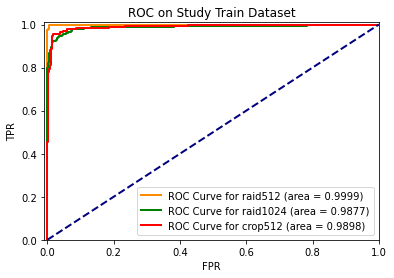

In [73]:
showROC("ROC on Study Train Dataset",
        study_train_fpr, 
        study_train_tpr, 
        study_train_auc)

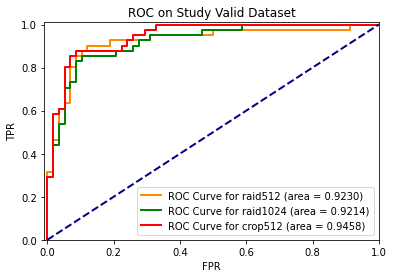

In [74]:
showROC("ROC on Study Valid Dataset",   
        study_valid_fpr, 
        study_valid_tpr, 
        study_valid_auc)

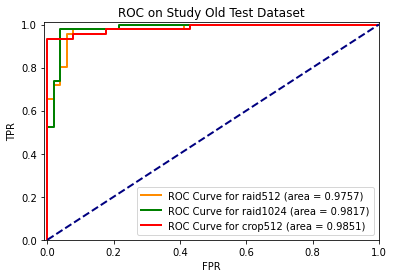

In [75]:
showROC("ROC on Study Old Test Dataset",  
        study_test_fpr, 
        study_test_tpr, 
        study_test_auc)

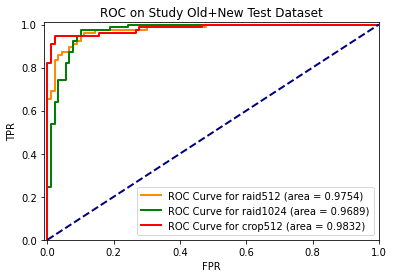

In [76]:
showROC("ROC on Study Old+New Test Dataset",  
        study_ctest_fpr, 
        study_ctest_tpr, 
        study_ctest_auc)

In [69]:
train_fpr = []
train_tpr = []
train_auc = []
valid_fpr = []
valid_tpr = []
valid_auc = []
test_fpr = []
test_tpr = []
test_auc = []
for csv_file in csv_files:
    if "radio" in csv_file:
        if "_0" in csv_file:
            model = "raid5-512-8_acc.pth"
        elif "_1" in csv_file:
            model = "raid5-fix-1024-12_loss.pth"
        elif "_2" in csv_file:
            model = "crop2-fix-512-7_acc.pth"
        csv = pd.read_csv(csv_file, sep=';')
        fpr_model, tpr_model, t = metrics.roc_curve(y_true=csv['Label'], y_score=csv[model])
        auc_model = metrics.auc(fpr_model, tpr_model)

        if "test" in csv_file:
            test_fpr.append(fpr_model)
            test_tpr.append(tpr_model)
            test_auc.append(auc_model)
        elif "valid" in csv_file:
            valid_fpr.append(fpr_model)
            valid_tpr.append(tpr_model)
            valid_auc.append(auc_model)
        elif "train" in csv_file:
            train_fpr.append(fpr_model)
            train_tpr.append(tpr_model)
            train_auc.append(auc_model)

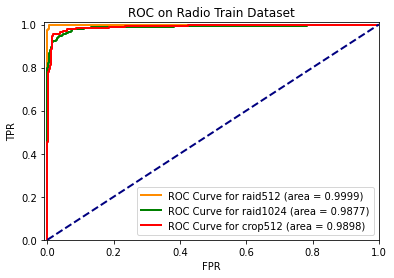

In [77]:
showROC("ROC on Radio Train Dataset",  
        study_train_fpr, 
        study_train_tpr, 
        study_train_auc)

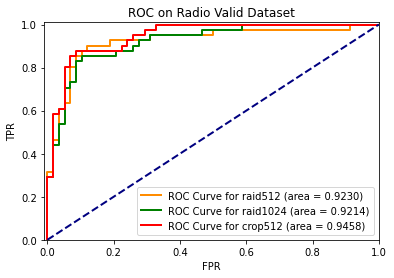

In [79]:
showROC("ROC on Radio Valid Dataset",  
        study_valid_fpr, 
        study_valid_tpr, 
        study_valid_auc)

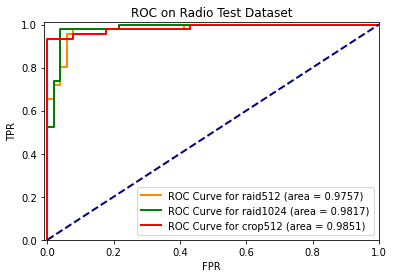

In [81]:
showROC("ROC on Radio Test Dataset",    
        study_test_fpr, 
        study_test_tpr, 
        study_test_auc)